# Лабораторная работа №2 — Оценка коэффициентов функциональной зависимости
## Выполнена по методу наименьших квадратов (МНК)
## Вариант 6

In [1]:
import numpy as np
from statistics import mean, median
from itertools import combinations
import pandas as pd


# === БЛОК 1. Исходные данные ===


In [18]:
m = 3
number_dimensions = 6

_strData = '''
1 170,0 7,4 -23,2 -48,5
2 56,6 3,7 -11,7 -23,2
3 112,9 1,8 6,4 -12,7
4 -5,8 -4,1 11,7 12,7
5 8,7 -7,4 22,8 23,2
6 492,7 -14,0 28,1 -76,1
'''

In [22]:
_numData = _strData.replace('\n', ' ').replace(',', '.').split(' ')[1:-1]
_shift = m + 2
data = [_numData[i * _shift + 1: i * _shift + _shift] for i in range(number_dimensions)]

# Таблица
# DataFrame исходных данных
df_source = pd.DataFrame(
    [[i + 1] + data[i][1:] + data[i][:1] for i in range(len(data))],
    columns=['№ ИЗМЕРЕНИЕ'] + [f'ПАР.{j + 1}' for j in range(m)] + ['РЕЗУЛЬТАТ']
)

print("Исходные данные:")
display(df_source)


Исходные данные:


,№ ИЗМЕРЕНИЕ,ПАР.1,ПАР.2,ПАР.3,РЕЗУЛЬТАТ
0,1,7.4,-23.2,-48.5,170.0
1,2,3.7,-11.7,-23.2,56.6
2,3,1.8,6.4,-12.7,112.9
3,4,-4.1,11.7,12.7,-5.8
4,5,-7.4,22.8,23.2,8.7
5,6,-14.0,28.1,-76.1,492.7


# === БЛОК 2. Решение полной системы ===

In [23]:
def system_solver(list_equations):
    left = np.array([i[1:] for i in list_equations]).astype(float)
    right = np.array([i[:1] for i in list_equations]).astype(float)
    X, residuals, _, _ = np.linalg.lstsq(left, right, rcond=None)
    return X

itog = system_solver(data)

print("\nРассчёт на полной выборке (наилучшая оценка):")
for idx, val in enumerate(itog):
    print(f"ПАР.{idx + 1} = {val[0]:.4f}")


Рассчёт на полной выборке (наилучшая оценка):
ПАР.1 = 5.5994
ПАР.2 = 6.4243
ПАР.3 = -5.1892


# === БЛОК 3. Генерация всех комбинаций по методу Cnk ===


In [24]:
_temp_list = [i + 1 for i in range(number_dimensions)]
_all_combinations = []
for r in range(m + 1, number_dimensions):
    _all_combinations.extend(combinations(_temp_list, r))

def combination_calculations():
    result = []
    for n, i in enumerate(_all_combinations):
        x = system_solver([data[dim - 1] for dim in i])
        result.append([n + 1, i, x])
    return result

combination_result = combination_calculations()




# === БЛОК 4. Вывод таблицы комбинаций ===


In [25]:
# Комбинации
comb_rows = []
for comb in combination_result:
    comb_rows.append([comb[0], comb[1], *[i[0] for i in comb[2]]])

df_combinations = pd.DataFrame(
    comb_rows,
    columns=['№ КОМБИНАЦИЯ', '№ ИЗМЕРЕНИЯ'] + [f'ПАР.{j + 1}' for j in range(m)]
)

print("Комбинации измерений и оценки:")
display(df_combinations)


Комбинации измерений и оценки:


,№ КОМБИНАЦИЯ,№ ИЗМЕРЕНИЯ,ПАР.1,ПАР.2,ПАР.3
0,1,"(1, 2, 3, 4)",-2.859812,5.637176,-6.474902
1,2,"(1, 2, 3, 5)",-5.578442,5.595341,-6.873470
2,3,"(1, 2, 3, 6)",5.106118,5.746210,-5.293395
3,4,"(1, 2, 4, 5)",24.801433,15.729221,-7.096290
4,5,"(1, 2, 4, 6)",277.644362,113.743535,-15.551490
5,6,"(1, 2, 5, 6)",58.252491,26.781952,-7.299992
6,7,"(1, 3, 4, 5)",-6.047558,5.449072,-7.031568
7,8,"(1, 3, 4, 6)",5.065620,5.690219,-5.322899
8,9,"(1, 3, 5, 6)",5.718457,6.348751,-5.236766
9,10,"(1, 4, 5, 6)",59.480453,27.238620,-7.371100


# === БЛОК 5. Анализ разброса оценок ===


In [26]:
pi = [[j[2][i][0] for j in combination_result] for i in range(m)]


for idx, param in enumerate(pi):
    print(f"\nАнализ параметра ПАР.{idx + 1}")
    df_stats = pd.DataFrame({
        'Метрика': ['Полная оценка', 'Среднее', 'Медиана', 'Мин', 'Макс'],
        'Значение': [
            round(itog[idx][0], 4),
            round(mean(param), 4),
            round(median(param), 4),
            round(min(param), 4),
            round(max(param), 4)
        ]
    })
    display(df_stats)



Анализ параметра ПАР.1


,Метрика,Значение
0,Полная оценка,5.5994
1,Среднее,25.3000
2,Медиана,5.0656
3,Мин,-6.0476
4,Макс,277.6444



Анализ параметра ПАР.2


,Метрика,Значение
0,Полная оценка,6.4243
1,Среднее,14.9573
2,Медиана,6.4760
3,Мин,5.4491
4,Макс,113.7435



Анализ параметра ПАР.3


,Метрика,Значение
0,Полная оценка,-5.1892
1,Среднее,-6.3611
2,Медиана,-5.3229
3,Мин,-15.5515
4,Макс,-4.8467


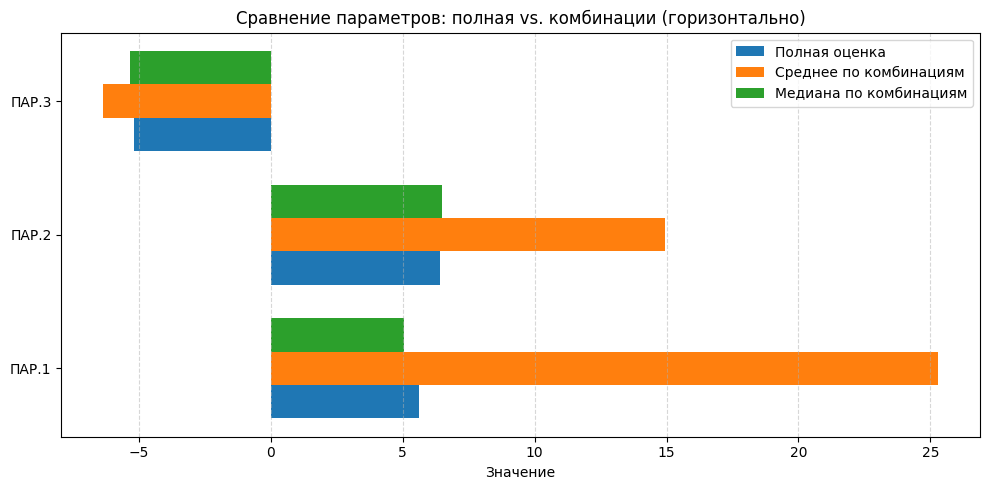

In [30]:
plt.style.use('default')
labels = [f'ПАР.{i + 1}' for i in range(m)]
full = [itog[i][0] for i in range(m)]
avg = [mean(pi[i]) for i in range(m)]
med = [median(pi[i]) for i in range(m)]

x = np.arange(m)
height = 0.25

plt.figure(figsize=(10, 5))
plt.barh(x - height, full, height, label='Полная оценка')
plt.barh(x, avg, height, label='Среднее по комбинациям')
plt.barh(x + height, med, height, label='Медиана по комбинациям')

plt.yticks(x, labels)
plt.xlabel('Значение')
plt.title('Сравнение параметров: полная vs. комбинации (горизонтально)')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


На основании анализа результатов можно сделать следующие выводы:

1. Наилучшая линейная несмещённая оценка коэффициентов, полученная по всей системе уравнений, имеет устойчивые значения и близка к медианным значениям, полученным при переборе подмножеств.

2. Однако средние значения коэффициентов по комбинациям могут существенно отклоняться, особенно для параметра ПАР.1. Например, в комбинации №5 наблюдается значительное увеличение значения коэффициента до 277.64, что указывает на наличие выброса, связанного с плохо обусловленной системой уравнений.

3. Медианные оценки по всем трём параметрам значительно ближе к полным оценкам, чем средние, что подтверждает наличие сильных выбросов в части комбинаций.

4. Таким образом, использование полной системы уравнений обеспечивает более надёжную оценку коэффициентов модели. Перебор подмножеств полезен для анализа устойчивости оценок и выявления аномальных сочетаний наблюдений.

5. Графический анализ (barplot) дополнительно подтвердил наличие отдельных резких выбросов в выборке, особенно по ПАР.1. Это подчёркивает важность предварительного анализа устойчивости модели при работе с небольшими наборами данных.